<a href="https://colab.research.google.com/github/MohitNaren/ML/blob/main/ml7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_data.data)

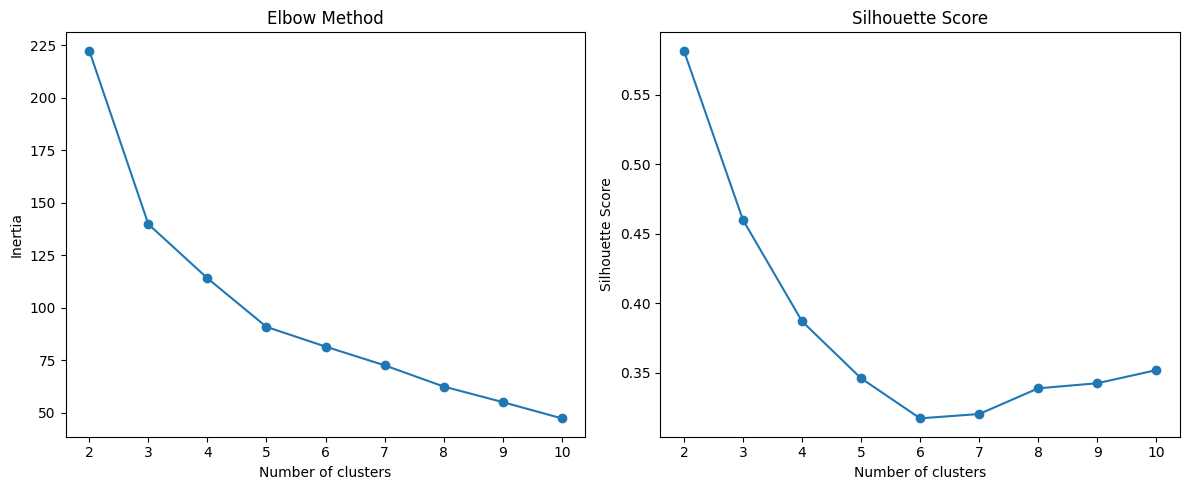

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)

plt.tight_layout()
plt.show()

In [4]:
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_model.fit(scaled_features)

KMeans(n_clusters=3, n_init=10, random_state=42)

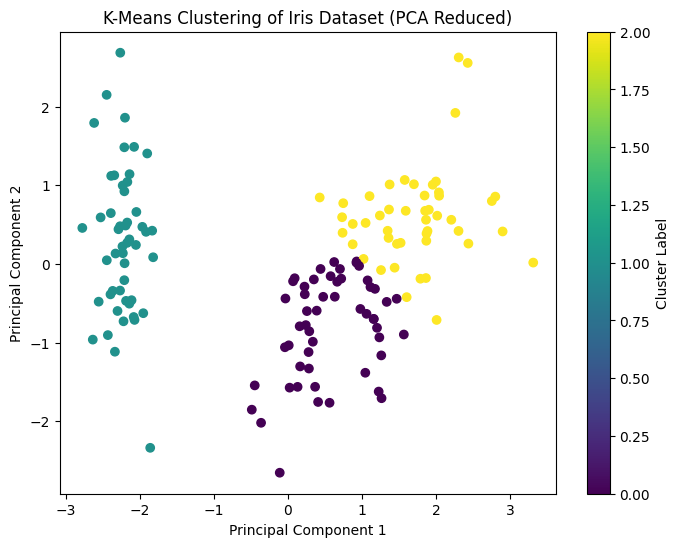

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Iris Dataset (PCA Reduced)')
plt.colorbar(label='Cluster Label')
plt.show()

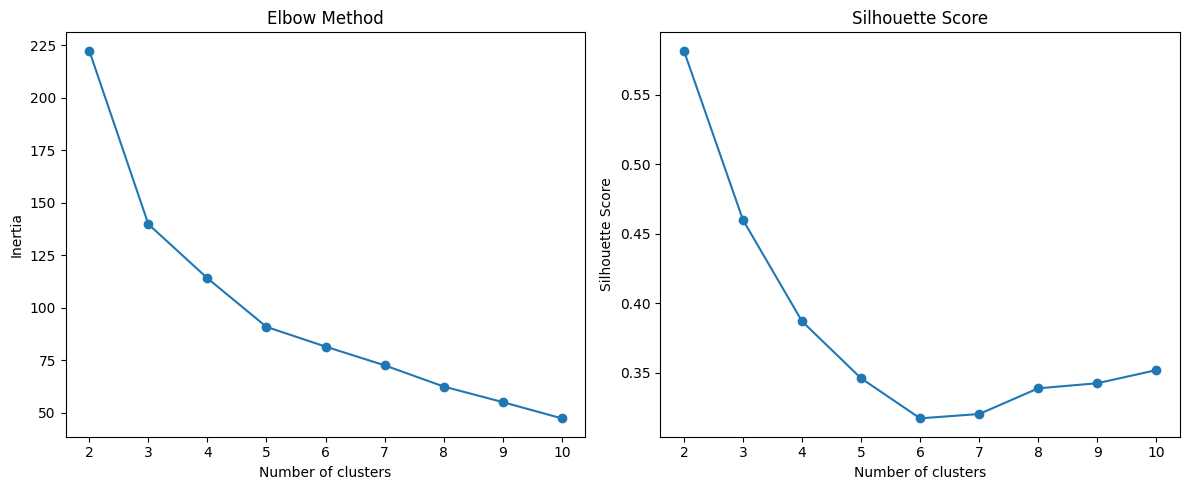

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Define a range of potential cluster numbers (e.g., from 2 to 10).
k_range = range(2, 11)

# 2. Initialize empty lists to store inertia and silhouette scores.
inertia = []
silhouette_scores = []

# 3. Loop through the defined range of cluster numbers.
for k in k_range:
    # 4. For each number of clusters, instantiate a KMeans model with random_state=42 and n_init=10.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # 5. Fit the KMeans model to the scaled features.
    kmeans.fit(scaled_features)
    # 6. Append the model's inertia to the inertia list.
    inertia.append(kmeans.inertia_)
    # 7. Calculate the silhouette score for the current clustering and append it to the silhouette scores list.
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# 8. Create a figure with two subplots.
plt.figure(figsize=(12, 5))

# 9. In the first subplot, plot the inertia against the number of clusters (Elbow Method). Label the axes appropriately and add a title.
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)

# 10. In the second subplot, plot the silhouette scores against the number of clusters. Label the axes appropriately and add a title.
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)

# 11. Use plt.tight_layout() to adjust subplot parameters for a tight layout.
plt.tight_layout()
# 12. Display the plots.
plt.show()

In [7]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from scipy.spatial.distance import pdist, squareform, jaccard

# Calculate pairwise Euclidean distance matrix
euclidean_dist_matrix = euclidean_distances(scaled_features)
print("Euclidean Distance Matrix Shape:", euclidean_dist_matrix.shape)

# Calculate pairwise Manhattan distance matrix
manhattan_dist_matrix = manhattan_distances(scaled_features)
print("Manhattan Distance Matrix Shape:", manhattan_dist_matrix.shape)

# Calculate pairwise Cosine distance matrix (1 - cosine similarity)
cosine_dist_matrix = 1 - cosine_similarity(scaled_features)
print("Cosine Distance Matrix Shape:", cosine_dist_matrix.shape)

# Calculate pairwise Minkowski distance matrix (p=3)
minkowski_dist_matrix = squareform(pdist(scaled_features, metric='minkowski', p=3))
print("Minkowski Distance Matrix (p=3) Shape:", minkowski_dist_matrix.shape)

# Calculate pairwise Jaccard distance matrix (requires binary data or converting to binary)
# For demonstration purposes with the Iris dataset, we can binarize the data.
# However, Jaccard distance is typically used for binary data.
# As the Iris dataset is not inherently binary, applying Jaccard might not be
# directly meaningful without appropriate data transformation.
# We will skip calculating Jaccard distance matrix for this continuous dataset.
# print("Jaccard distance is typically for binary data and is not directly applicable to this dataset without transformation.")


Euclidean Distance Matrix Shape: (150, 150)
Manhattan Distance Matrix Shape: (150, 150)
Cosine Distance Matrix Shape: (150, 150)
Minkowski Distance Matrix (p=3) Shape: (150, 150)


**Reasoning**:
Briefly describe the characteristics and applicability of each chosen distance measure in the context of clustering and data preprocessing.



In [8]:
print("Characteristics and Applicability of Distance Measures:")

print("\nEuclidean Distance:")
print("- Also known as L2 norm.")
print("- Measures the straight-line distance between two points in Euclidean space.")
print("- Suitable for continuous data where the magnitude of differences is important.")
print("- Sensitive to the scale of features, often requires feature scaling.")
print("- Default distance metric for standard K-Means.")

print("\nManhattan Distance:")
print("- Also known as L1 norm or taxicab distance.")
print("- Measures the sum of the absolute differences between the coordinates of two points.")
print("- Less sensitive to outliers than Euclidean distance.")
print("- Suitable for continuous data, especially when dealing with features with different units or when movement is constrained to grid-like paths.")

print("\nCosine Distance:")
print("- Measures the cosine of the angle between two vectors.")
print("- Focuses on the orientation of vectors rather than their magnitude.")
print("- Useful for high-dimensional data, such as text data (document similarity) or gene expression data.")
print("- Applicable when the relative proportions of features are more important than their absolute values.")

print("\nMinkowski Distance:")
print("- A generalization of Euclidean and Manhattan distances.")
print("- Defined by a parameter 'p'. When p=1, it's Manhattan distance; when p=2, it's Euclidean distance.")
print("- Allows for tuning the emphasis on large differences between coordinates.")
print("- Suitable for continuous data, offering flexibility in how distance is measured.")

print("\nJaccard Distance:")
print("- Measures the dissimilarity between two sets.")
print("- Calculated as 1 minus the Jaccard similarity coefficient (intersection size / union size).")
print("- Primarily used for binary data or sets (e.g., presence/absence of features, item purchase history).")
print("- Not directly applicable to continuous data without transformation (e.g., binarization).")

Characteristics and Applicability of Distance Measures:

Euclidean Distance:
- Also known as L2 norm.
- Measures the straight-line distance between two points in Euclidean space.
- Suitable for continuous data where the magnitude of differences is important.
- Sensitive to the scale of features, often requires feature scaling.
- Default distance metric for standard K-Means.

Manhattan Distance:
- Also known as L1 norm or taxicab distance.
- Measures the sum of the absolute differences between the coordinates of two points.
- Less sensitive to outliers than Euclidean distance.
- Suitable for continuous data, especially when dealing with features with different units or when movement is constrained to grid-like paths.

Cosine Distance:
- Measures the cosine of the angle between two vectors.
- Focuses on the orientation of vectors rather than their magnitude.
- Useful for high-dimensional data, such as text data (document similarity) or gene expression data.
- Applicable when the relative

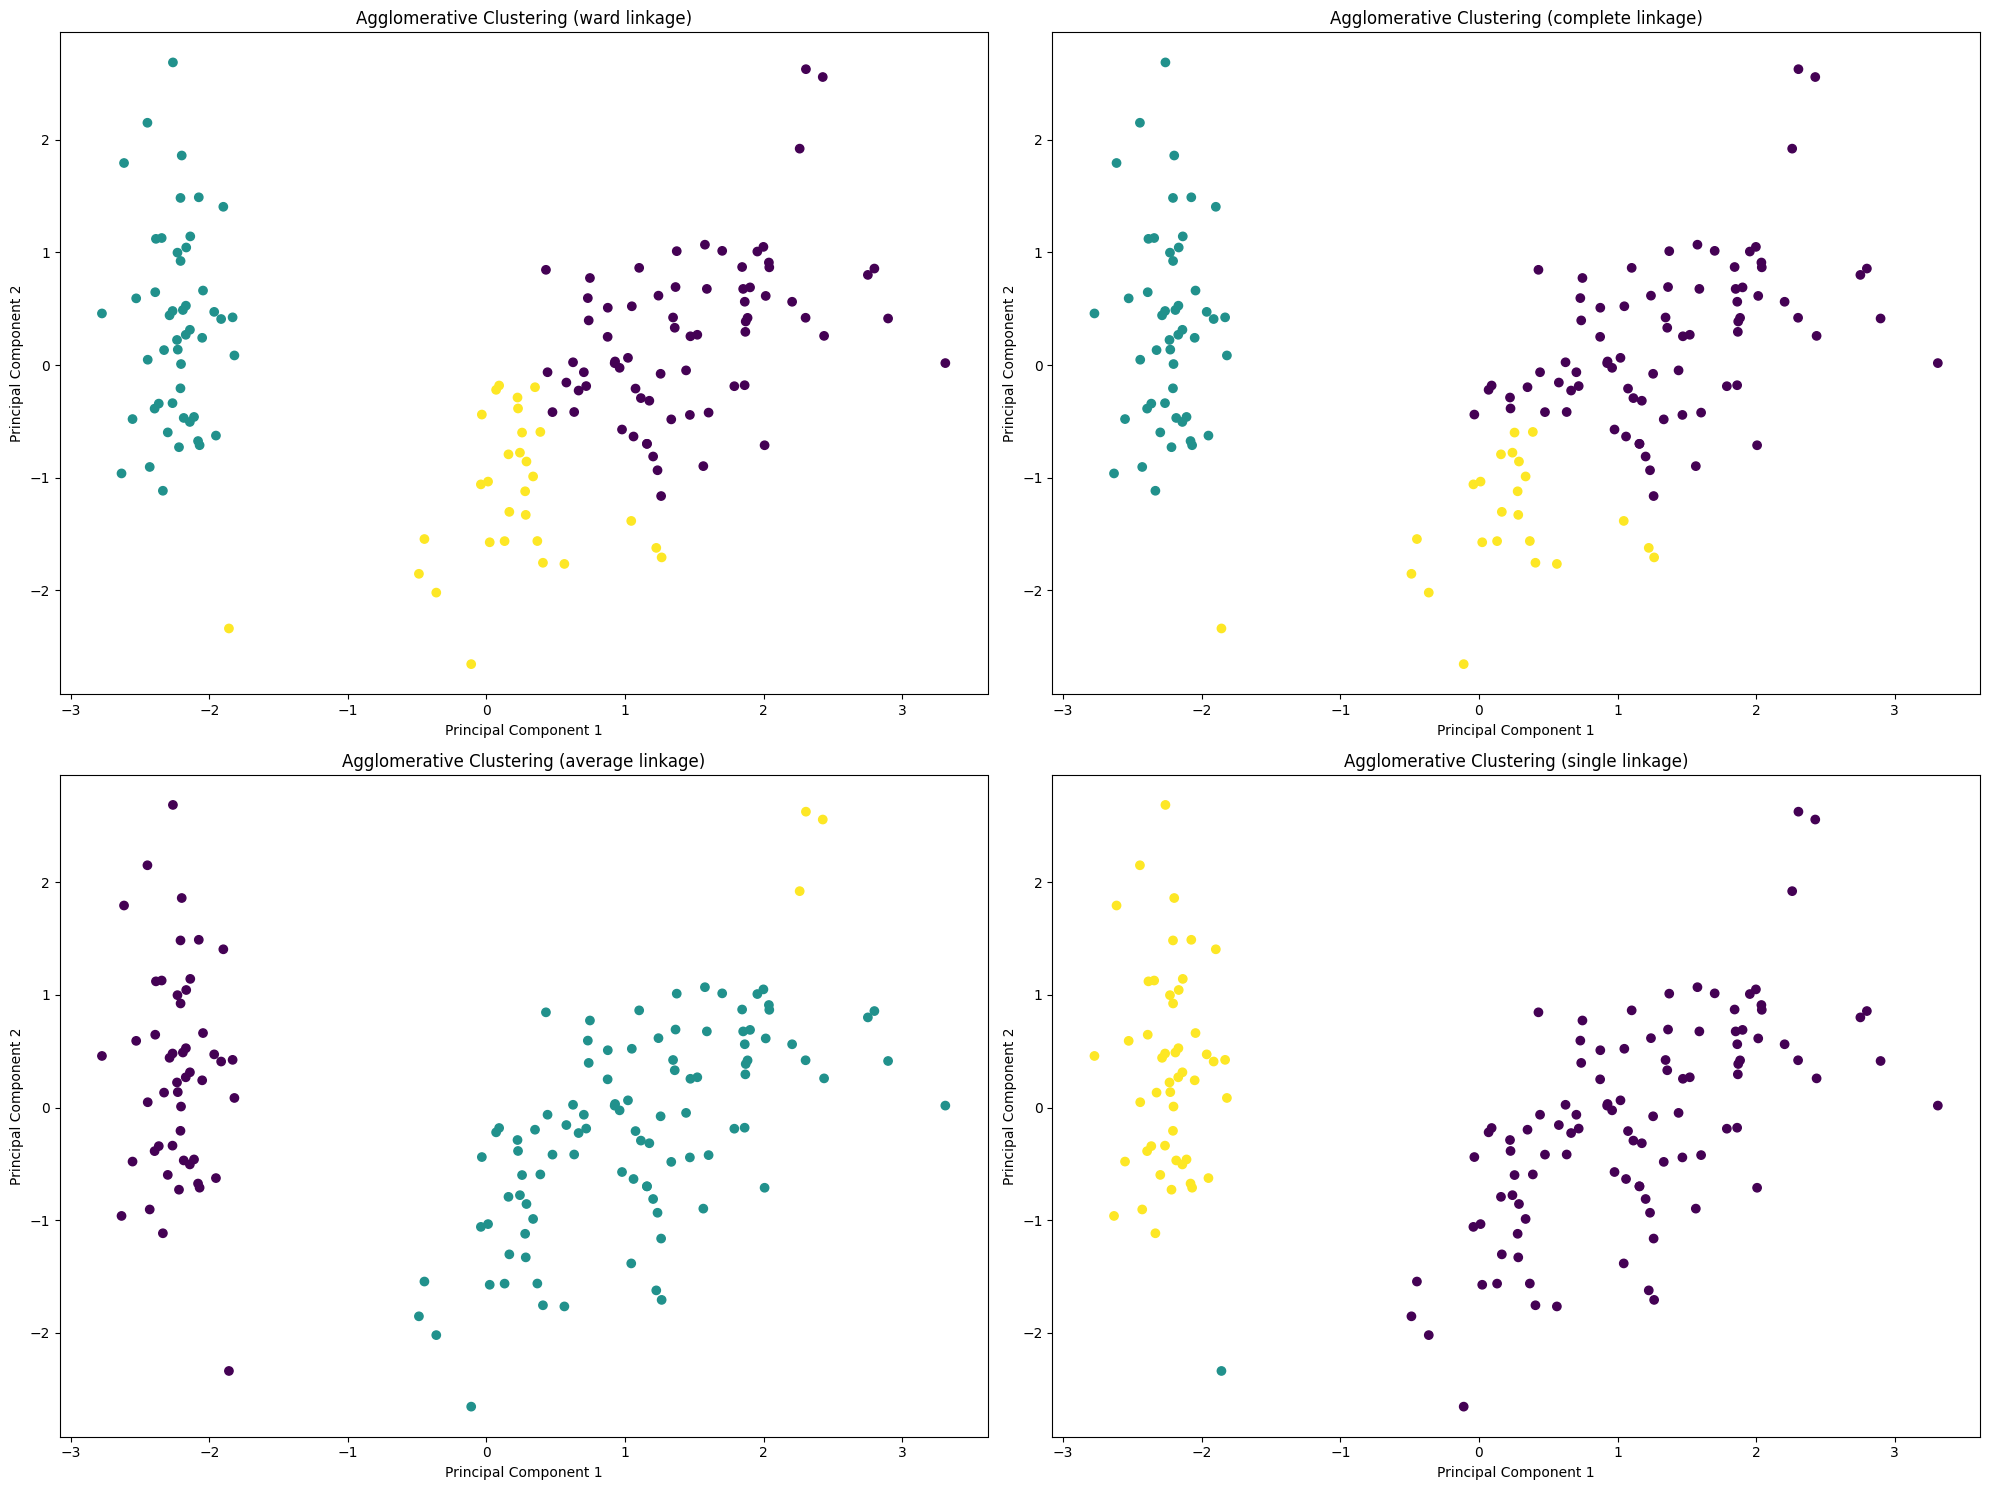

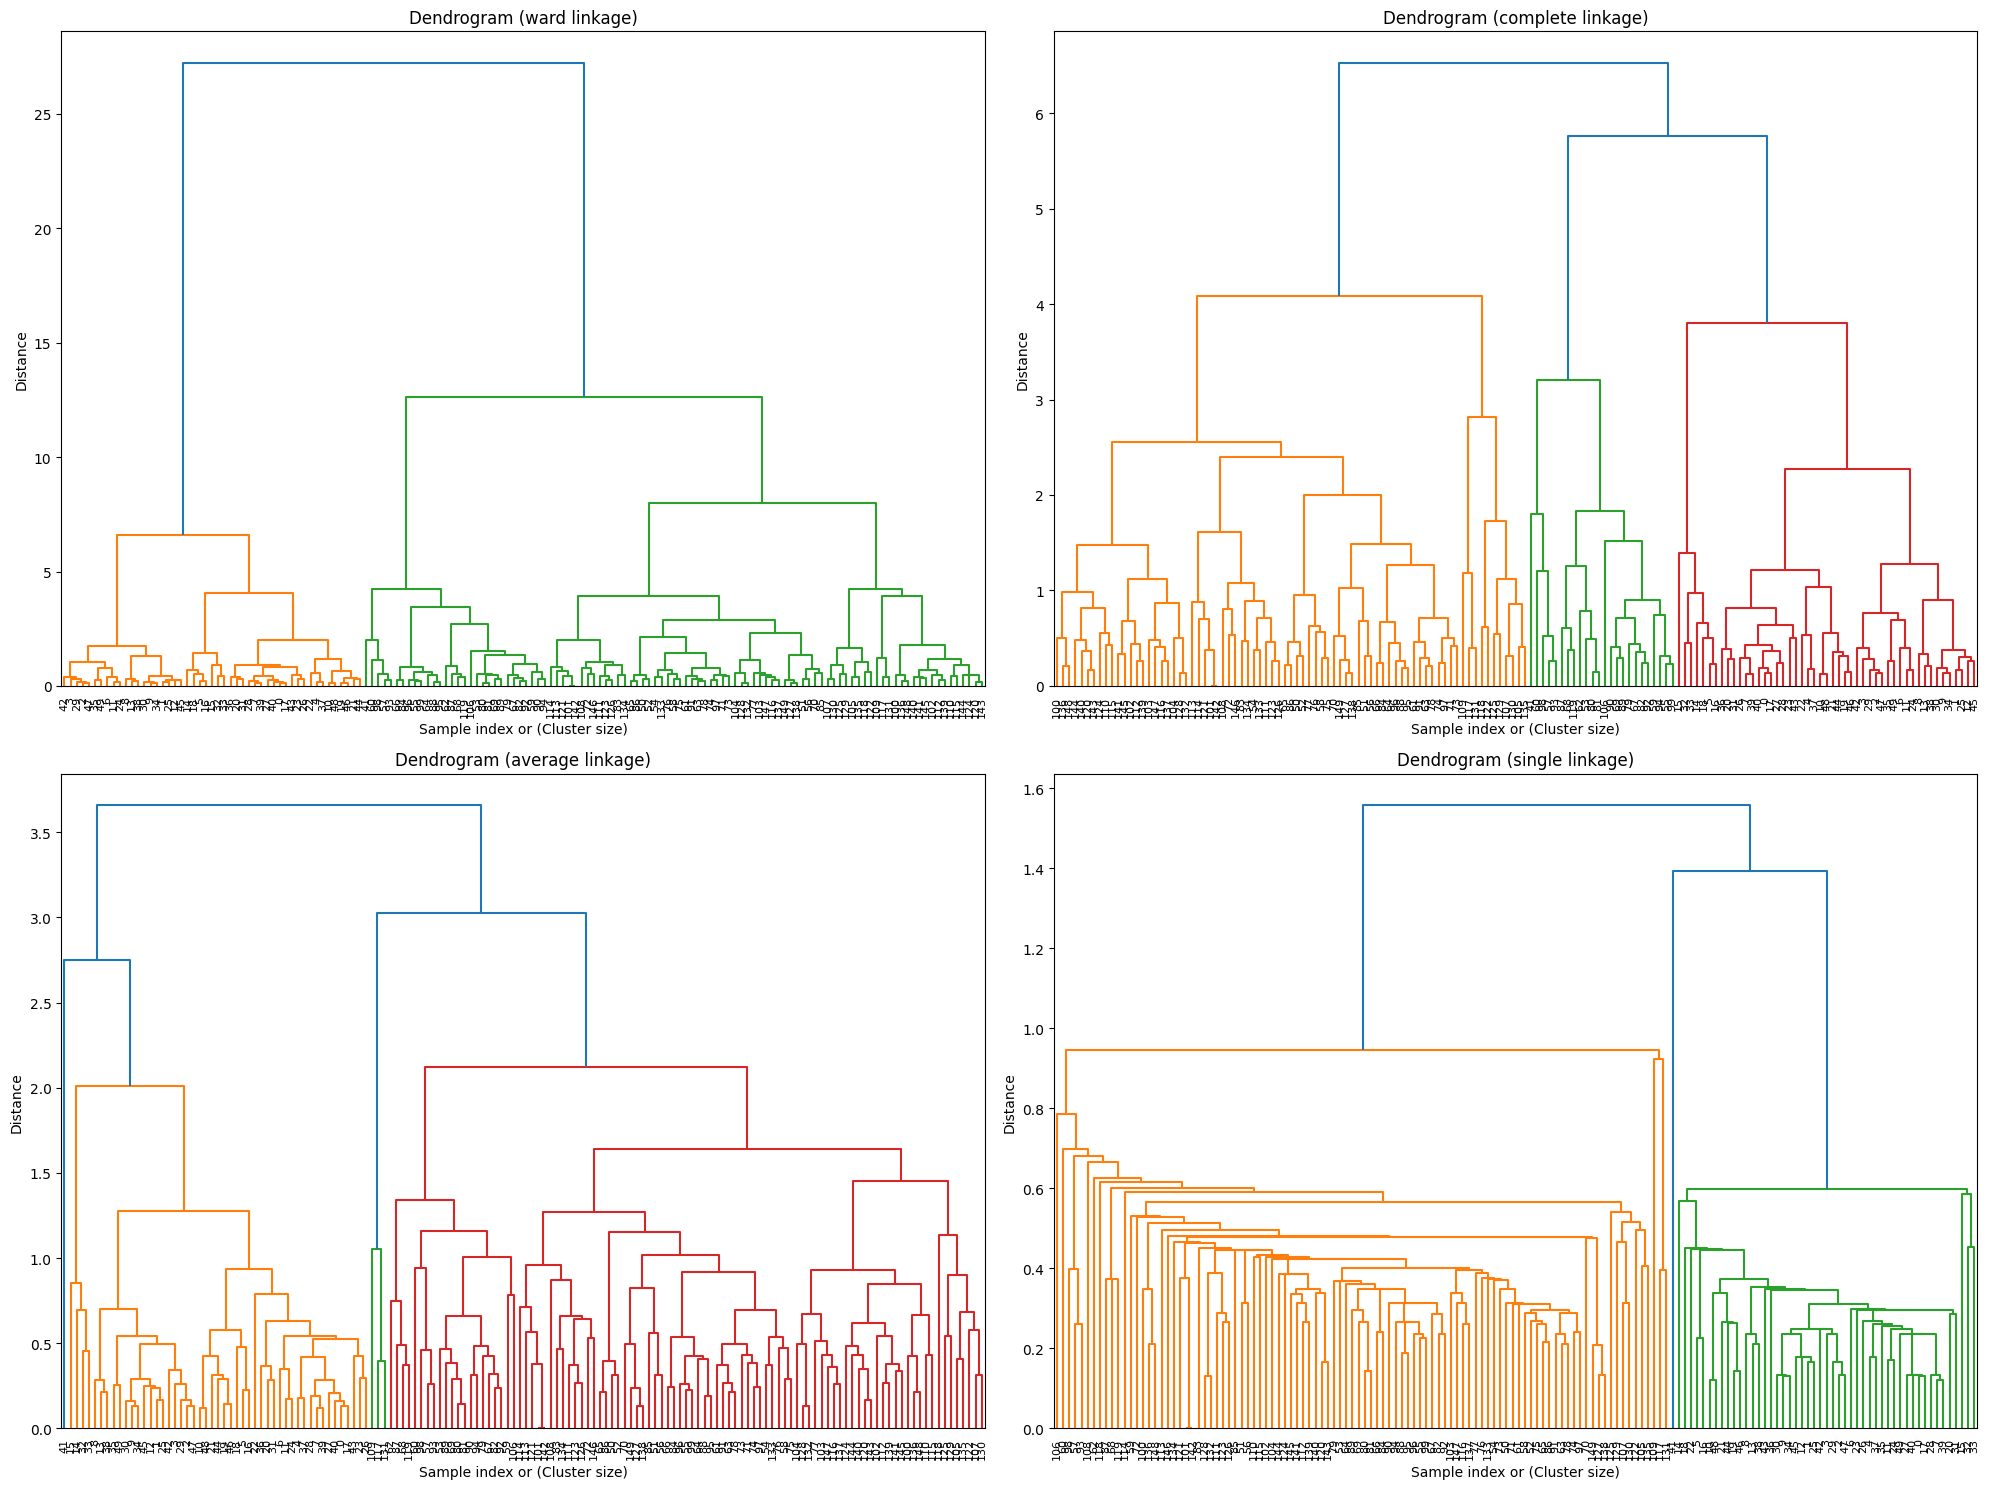


Conceptual Approach to Divisive Hierarchical Clustering:
Divisive hierarchical clustering is a top-down approach.
It starts with all data points in a single cluster.
The cluster is recursively split into smaller clusters until each data point forms its own cluster.
The splitting criteria can vary, for example, splitting a cluster to maximize the variance between the resulting sub-clusters.
While scikit-learn's AgglomerativeClustering implements the bottom-up approach, a direct implementation of divisive clustering is not readily available as a separate class in scikit-learn as of my last update.
It could be implemented custom by iteratively applying a partitioning algorithm (like K-Means with k=2) or by finding the most 'dissimilar' points to initiate splits.


In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Implement Agglomerative Hierarchical Clustering

# Linkage types to explore
linkage_types = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(20, 15))

for i, linkage_type in enumerate(linkage_types):
    # Apply Agglomerative Clustering
    # We'll use n_clusters=3 based on the K-Means analysis, but hierarchical clustering
    # is often explored without a pre-defined number of clusters by examining the dendrogram.
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage_type)
    agg_labels = agg_clustering.fit_predict(scaled_features)

    # Plotting for visualization (optional but helpful) - using a scatter plot of the PCA reduced data
    plt.subplot(2, 2, i + 1)
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=agg_labels, cmap='viridis')
    plt.title(f'Agglomerative Clustering ({linkage_type} linkage)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    # We don't add a colorbar here as we will plot dendrograms separately which are more
    # indicative of hierarchical clustering structure.

plt.tight_layout()
plt.show()

# Plotting Dendrograms for different linkage types
# Dendrograms are more informative for hierarchical clustering to see the merging process
plt.figure(figsize=(20, 15))

for i, linkage_type in enumerate(linkage_types):
    plt.subplot(2, 2, i + 1)
    # Generate the linkage matrix
    Z = linkage(scaled_features, method=linkage_type)

    # Plot the dendrogram
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
    plt.title(f'Dendrogram ({linkage_type} linkage)')
    plt.xlabel('Sample index or (Cluster size)')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


# Conceptual Approach to Divisive Hierarchical Clustering
print("\nConceptual Approach to Divisive Hierarchical Clustering:")
print("Divisive hierarchical clustering is a top-down approach.")
print("It starts with all data points in a single cluster.")
print("The cluster is recursively split into smaller clusters until each data point forms its own cluster.")
print("The splitting criteria can vary, for example, splitting a cluster to maximize the variance between the resulting sub-clusters.")
print("While scikit-learn's AgglomerativeClustering implements the bottom-up approach, a direct implementation of divisive clustering is not readily available as a separate class in scikit-learn as of my last update.")
print("It could be implemented custom by iteratively applying a partitioning algorithm (like K-Means with k=2) or by finding the most 'dissimilar' points to initiate splits.")

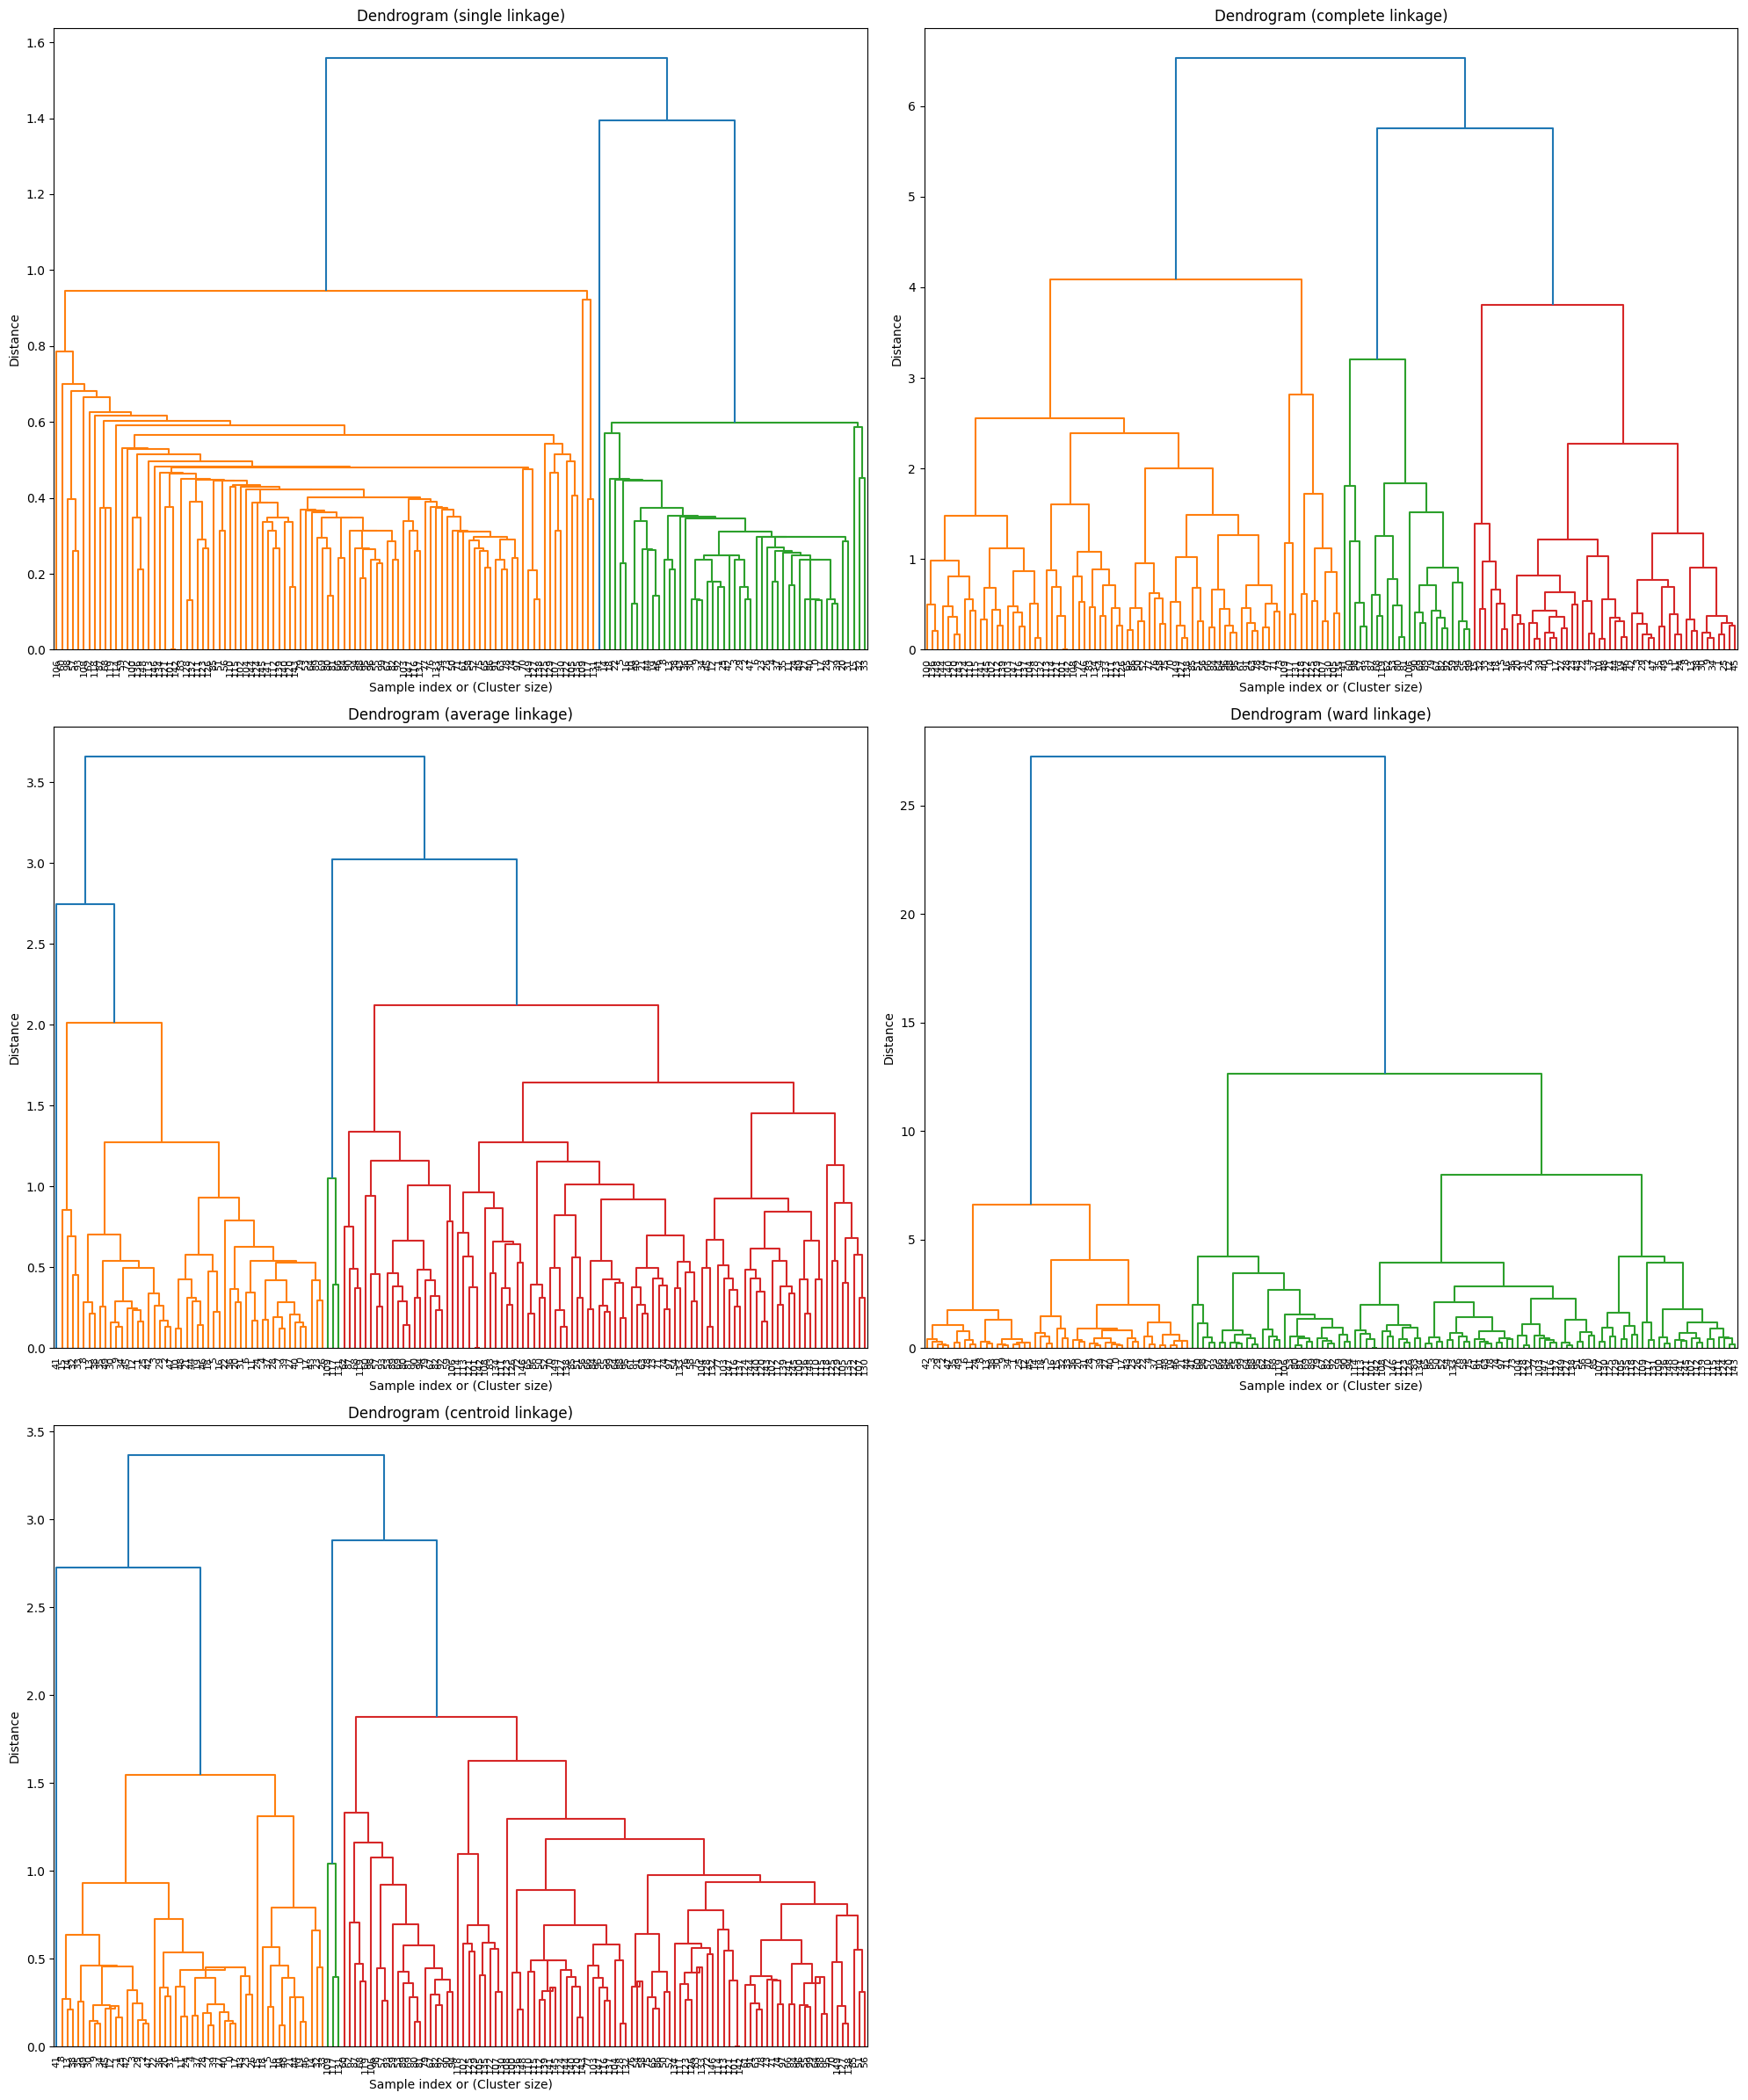


Characteristics of Linkage Types:
- Single Linkage: Uses the minimum distance between points in two clusters. Tends to form long, 'chained' clusters.
- Complete Linkage: Uses the maximum distance between points in two clusters. Tends to form more compact, spherical clusters.
- Average Linkage: Uses the average distance between all pairs of points in two clusters. Offers a balance between single and complete linkage.
- Ward's Linkage: Minimizes the variance of the clusters being merged. It uses the squared Euclidean distance and is typically used with variance-based distance metrics. Tends to produce more evenly sized clusters.
- Centroid Linkage: Uses the distance between the centroids of two clusters. Can sometimes lead to 'inversions' where a merge occurs at a lower distance than a previous merge.

How they affect dendrograms and cluster structures:
The linkage type determines how the distance between clusters is calculated, which in turn affects the order and distance at which clus

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Define a list of linkage types to demonstrate
linkage_types = ['single', 'complete', 'average', 'ward']
# Note: Centroid linkage is not directly available in scikit-learn's AgglomerativeClustering
# and its implementation in scipy.cluster.hierarchy.linkage can sometimes produce inversions.
# We will demonstrate the four standard linkage types first.
# For Centroid, we can conceptually describe it or attempt the scipy implementation with caution.
# Let's add 'centroid' for demonstration purposes using scipy's linkage.
all_linkage_types = ['single', 'complete', 'average', 'ward', 'centroid']

# Create a figure and subplots to display the dendrograms for each linkage type
# Adjust figure size based on the number of linkage types to be plotted
n_linkages = len(all_linkage_types)
# Determine grid size for subplots (e.g., 3x2 for 5 linkages)
n_cols = 2
n_rows = (n_linkages + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 10, n_rows * 8)) # Adjust figure size as needed

# Iterate through the list of linkage types
for i, linkage_type in enumerate(all_linkage_types):
    plt.subplot(n_rows, n_cols, i + 1)

    try:
        # Generate the linkage matrix using linkage on the scaled_features
        # Centroid linkage requires a specific distance metric, often Euclidean.
        # For consistency with Ward which is based on variance (related to squared Euclidean),
        # we will use 'euclidean' distance for centroid linkage as well in the linkage function.
        # For other methods, the default Euclidean distance in linkage is usually appropriate
        # or handled internally by the method (like Ward).
        if linkage_type == 'centroid':
             Z = linkage(scaled_features, method=linkage_type, metric='euclidean')
        else:
             Z = linkage(scaled_features, method=linkage_type)

        # Plot the dendrogram using the generated linkage matrix
        dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
        plt.title(f'Dendrogram ({linkage_type} linkage)')
        plt.xlabel('Sample index or (Cluster size)')
        plt.ylabel('Distance')
    except Exception as e:
        plt.title(f'Dendrogram ({linkage_type} linkage) - Error')
        plt.text(0.5, 0.5, f'Could not generate dendrogram:\n{e}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')
        print(f"Error generating dendrogram for {linkage_type} linkage: {e}")


# Use plt.tight_layout() to adjust the plots for better visualization
plt.tight_layout()
# Display the plots
plt.show()

# Briefly explain the characteristics of each linkage type
print("\nCharacteristics of Linkage Types:")
print("- Single Linkage: Uses the minimum distance between points in two clusters. Tends to form long, 'chained' clusters.")
print("- Complete Linkage: Uses the maximum distance between points in two clusters. Tends to form more compact, spherical clusters.")
print("- Average Linkage: Uses the average distance between all pairs of points in two clusters. Offers a balance between single and complete linkage.")
print("- Ward's Linkage: Minimizes the variance of the clusters being merged. It uses the squared Euclidean distance and is typically used with variance-based distance metrics. Tends to produce more evenly sized clusters.")
print("- Centroid Linkage: Uses the distance between the centroids of two clusters. Can sometimes lead to 'inversions' where a merge occurs at a lower distance than a previous merge.")

print("\nHow they affect dendrograms and cluster structures:")
print("The linkage type determines how the distance between clusters is calculated, which in turn affects the order and distance at which clusters are merged.")
print("- Single linkage dendrograms often show early merges at low distances.")
print("- Complete linkage dendrograms tend to show merges at higher distances.")
print("- Average linkage dendrograms are typically somewhere in between.")
print("- Ward's linkage focuses on minimizing variance, leading to dendrograms that reflect this criterion.")
print("- Centroid linkage dendrograms can sometimes show non-monotonic merge distances (inversions).")
print("\nWard's linkage is typically used with variance-based distance metrics, most commonly squared Euclidean distance.")

In [11]:
from sklearn.cluster import Birch

# Instantiate and fit the Birch model
# Start with default parameters
birch_model = Birch()
birch_model.fit(scaled_features)

# Get the cluster labels
birch_labels = birch_model.labels_

# Print a message about CHAMELEON
print("CHAMELEON clustering algorithm is not directly available in scikit-learn.")
print("It's a hierarchical clustering algorithm that considers both the proximity of data points")
print("and the interconnectivity between clusters to merge them.")

CHAMELEON clustering algorithm is not directly available in scikit-learn.
It's a hierarchical clustering algorithm that considers both the proximity of data points
and the interconnectivity between clusters to merge them.


In [12]:
from sklearn.cluster import DBSCAN
import numpy as np

# Instantiate a DBSCAN object with default parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the scaled_features data
dbscan.fit(scaled_features)

# Store the cluster labels
dbscan_labels = dbscan.labels_

# Print the unique cluster labels and their counts
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
print("Unique DBSCAN labels:", unique_labels)
print("Counts for each label:", counts)

Unique DBSCAN labels: [-1  0  1]
Counts for each label: [34 45 71]


In [13]:
from sklearn.cluster import SpectralClustering

# Instantiate a SpectralClustering object
# Use n_clusters=3, random_state=42, and assign_labels='discretize' as specified.
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42, assign_labels='discretize')

# Fit the SpectralClustering model to the scaled_features data and get the cluster labels
spectral_labels = spectral_clustering.fit_predict(scaled_features)

# Print the resulting cluster labels (optional, for verification)
print("Spectral Clustering labels shape:", spectral_labels.shape)
print("First 10 Spectral Clustering labels:", spectral_labels[:10])

Spectral Clustering labels shape: (150,)
First 10 Spectral Clustering labels: [1 1 1 1 1 1 1 1 1 1]


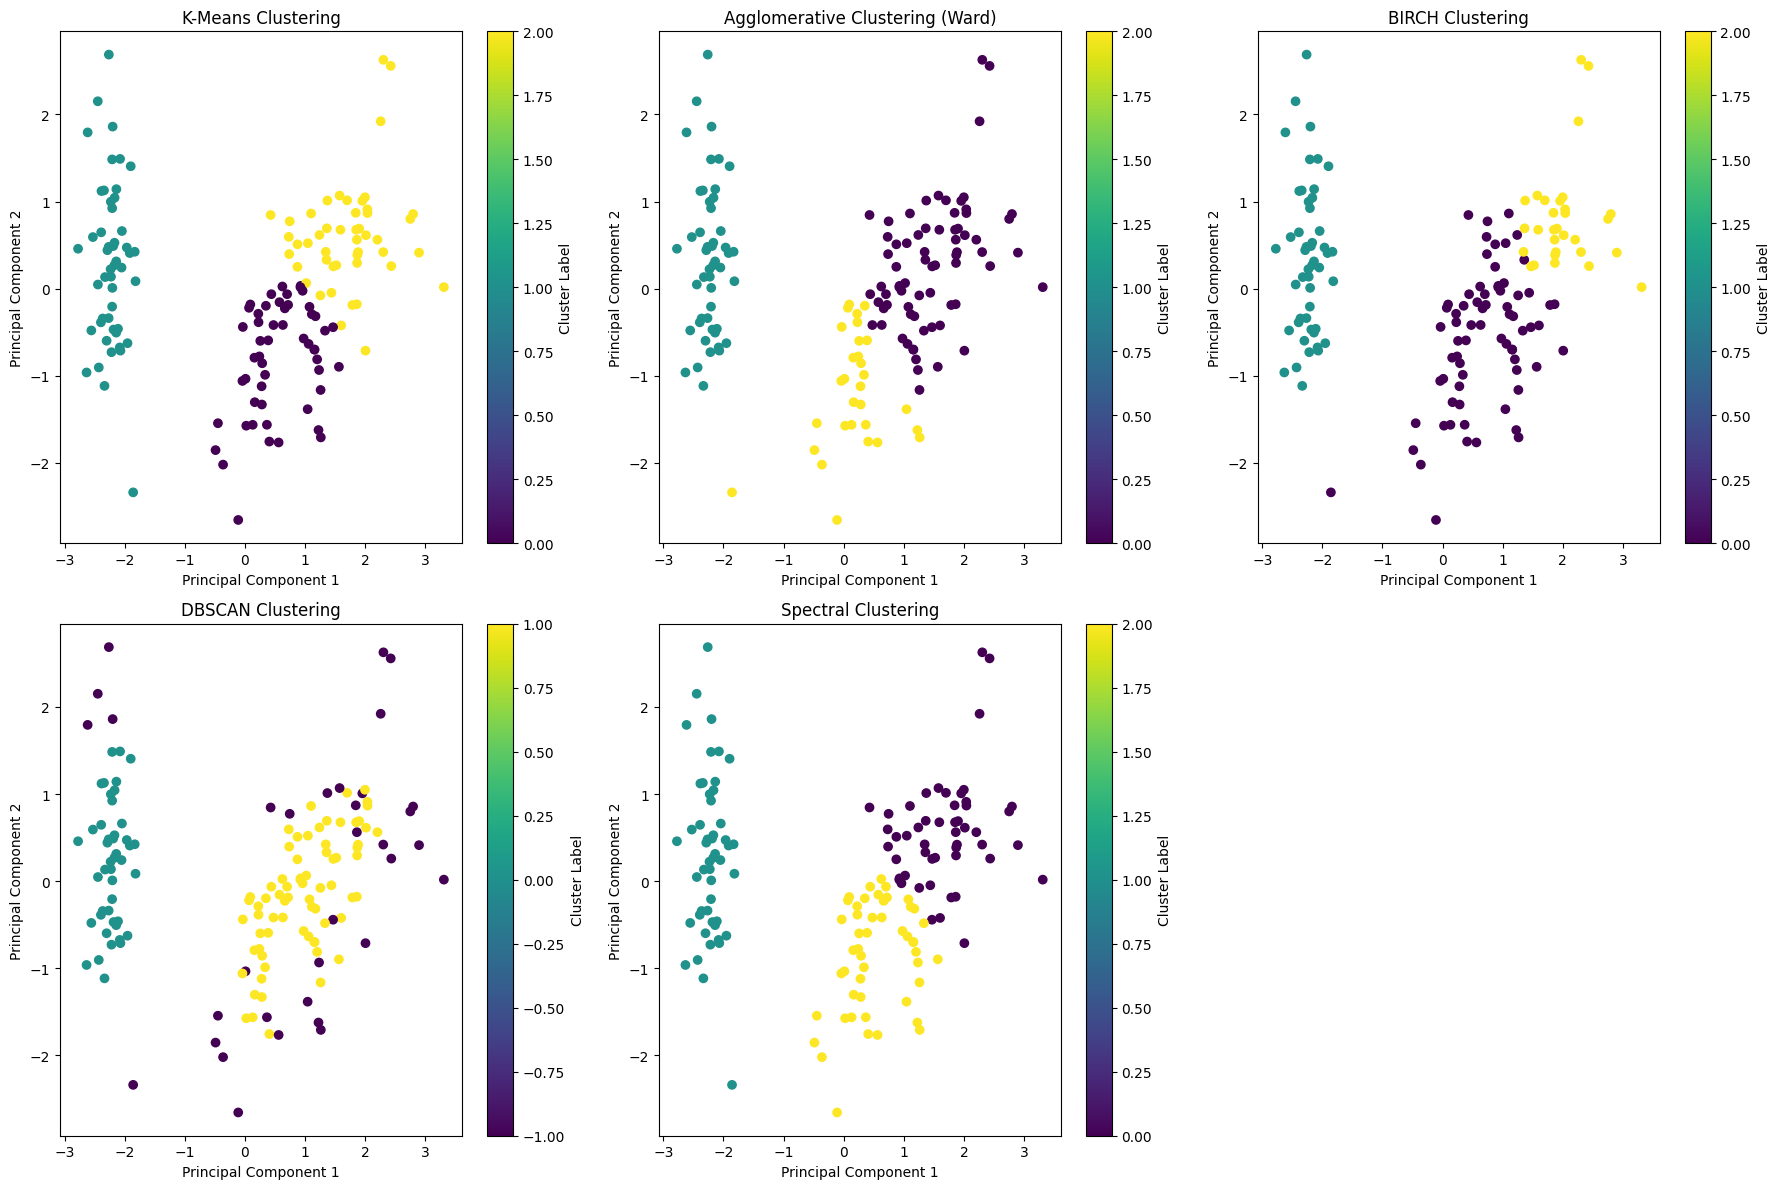

In [14]:
 import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, Birch, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA

# Assuming pca_features is already computed from a previous step
# Assuming scaled_features is already computed from a previous step

# Re-run clustering algorithms to get labels if not already in the current session
# K-Means labels (already computed in a previous step as kmeans_model.labels_)
# Agglomerative Clustering (using Ward linkage as an example)
agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_ward.fit_predict(scaled_features)

# BIRCH clustering
birch_model = Birch(n_clusters=3) # Specify n_clusters for a more comparable result
birch_model.fit(scaled_features)
birch_labels = birch_model.labels_

# DBSCAN clustering - needs eps and min_samples tuned or chosen. Using previous values.
# Note: DBSCAN may produce a different number of clusters or noise points (-1 label)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42, assign_labels='discretize')
spectral_labels = spectral_clustering.fit_predict(scaled_features)


# Create the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # Adjust figure size as needed
axes = axes.ravel() # Flatten the 2x3 array of axes for easy iteration

# List of labels and titles for each subplot
cluster_labels = [kmeans_model.labels_, agg_labels, birch_labels, dbscan_labels, spectral_labels]
titles = [
    'K-Means Clustering',
    'Agglomerative Clustering (Ward)',
    'BIRCH Clustering',
    'DBSCAN Clustering',
    'Spectral Clustering'
]

# Iterate through the algorithms and plot the results
for i, (labels, title) in enumerate(zip(cluster_labels, titles)):
    ax = axes[i]
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=labels, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    # Add colorbar
    fig.colorbar(scatter, ax=ax, label='Cluster Label')

# Hide any unused subplots
for j in range(len(cluster_labels), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()